# Lecture 2: Linear Regressions

Here, we'll see examples of how to use the scikit-learn linear regression class, as well as the statsmodels OLS function, which is much more similar to R's lm function.

[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression_)

In [1]:
%matplotlib inline

/Users/civisemployee/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

Let's make a random dataset where X is uniformly distributed between 0 and 1, and y is a cosine function plus noise:

In [3]:
np.random.seed(0)

n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
noise_size = 0.1
y = true_fun(X) + np.random.randn(n_samples) * noise_size

In [4]:
np.random.rand(n_samples)

array([ 0.19658236,  0.36872517,  0.82099323,  0.09710128,  0.83794491,
        0.09609841,  0.97645947,  0.4686512 ,  0.97676109,  0.60484552,
        0.73926358,  0.03918779,  0.28280696,  0.12019656,  0.2961402 ,
        0.11872772,  0.31798318,  0.41426299,  0.0641475 ,  0.69247212,
        0.56660145,  0.26538949,  0.52324805,  0.09394051,  0.5759465 ,
        0.9292962 ,  0.31856895,  0.66741038,  0.13179786,  0.7163272 ])

In [5]:
X.shape

(30,)

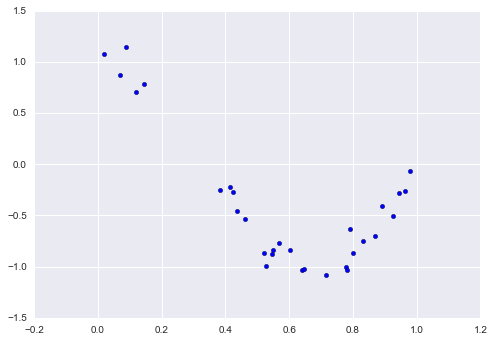

In [6]:
plt.scatter(X, y)

The scikit-learn linear regression class has the same programming interface we saw with k-NN:

In [7]:
linear_regression = LinearRegression()
linear_regression.fit(X.reshape((30, 1)), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can get the parameters of the fit:

In [8]:
print linear_regression.intercept_
print linear_regression.coef_

0.536680330318
[-1.60931179]


And we can print the predictions as a line:

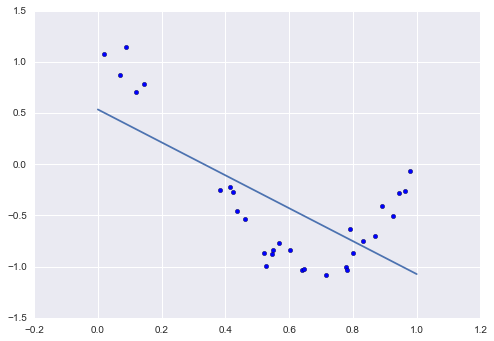

In [9]:
# equally spaced array of 100 values between 0 and 1, like the seq function in R
X_to_pred = np.linspace(0, 1, 100).reshape(100, 1)

preds = linear_regression.predict(X_to_pred)

plt.scatter(X, y)
plt.plot(X_to_pred, preds)
plt.show()

Let's fit a model of the form $y \sim x + x^2$ to try and capture some of the non-linearity in the underlying cosine function.

In [10]:
X**2

array([  4.08783595e-04,   5.04612156e-03,   7.59151487e-03,
         1.39888398e-02,   2.05501650e-02,   1.47027398e-01,
         1.71944524e-01,   1.79483389e-01,   1.91482567e-01,
         2.12963202e-01,   2.72325671e-01,   2.79729836e-01,
         2.96897683e-01,   3.01196262e-01,   3.22674623e-01,
         3.63323688e-01,   4.09498914e-01,   4.17179205e-01,
         5.11495830e-01,   6.05527929e-01,   6.09225795e-01,
         6.26828536e-01,   6.38654411e-01,   6.93255807e-01,
         7.56921138e-01,   7.95259085e-01,   8.56729137e-01,
         8.92399363e-01,   9.28645916e-01,   9.57693860e-01])

In [11]:
X2 = np.column_stack((X, X**2))
X2

array([[  2.02183974e-02,   4.08783595e-04],
       [  7.10360582e-02,   5.04612156e-03],
       [  8.71292997e-02,   7.59151487e-03],
       [  1.18274426e-01,   1.39888398e-02],
       [  1.43353287e-01,   2.05501650e-02],
       [  3.83441519e-01,   1.47027398e-01],
       [  4.14661940e-01,   1.71944524e-01],
       [  4.23654799e-01,   1.79483389e-01],
       [  4.37587211e-01,   1.91482567e-01],
       [  4.61479362e-01,   2.12963202e-01],
       [  5.21848322e-01,   2.72325671e-01],
       [  5.28894920e-01,   2.79729836e-01],
       [  5.44883183e-01,   2.96897683e-01],
       [  5.48813504e-01,   3.01196262e-01],
       [  5.68044561e-01,   3.22674623e-01],
       [  6.02763376e-01,   3.63323688e-01],
       [  6.39921021e-01,   4.09498914e-01],
       [  6.45894113e-01,   4.17179205e-01],
       [  7.15189366e-01,   5.11495830e-01],
       [  7.78156751e-01,   6.05527929e-01],
       [  7.80529176e-01,   6.09225795e-01],
       [  7.91725038e-01,   6.26828536e-01],
       [  

In [12]:
linear_regression.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print linear_regression.intercept_
print linear_regression.coef_

1.54114868724
[-7.31956683  5.55955392]


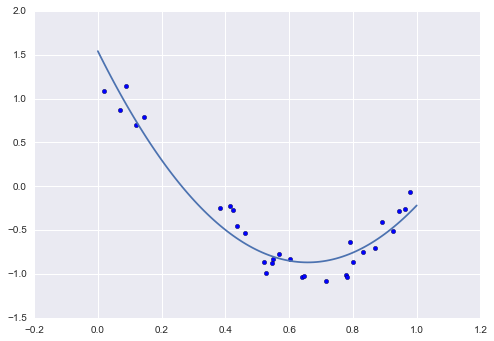

In [14]:
# equally spaced array of 100 values between 0 and 1, like the seq function in R
X_p = np.linspace(0, 1, 100).reshape(100, 1)
X_to_pred = np.column_stack((X_p, X_p**2))

preds = linear_regression.predict(X_to_pred)

plt.scatter(X, y)
plt.plot(X_p, preds)
plt.show()

## Statsmodels

The `statsmodels` package provides statistical functionality a lot like R's for doing OLS.  It should already be available on your machine if you've setup Anaconda.  Otherwise, you can run ```conda install statsmodels``` at a terminal/prompt.

[http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html)

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(9876789)

### Using A Formula to Fit to a Pandas Dataframe

[http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/formulas.html](http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/formulas.html)

In [16]:
# We load a datase compiled by A.M. Guerry in the 1830's looking at social factors like crime and literacy
# http://vincentarelbundock.github.io/Rdatasets/doc/HistData/Guerry.html
# In general, statsmodels can download any of the toy datasets provided in R, and provides
# the same documentation from within Python
dta = sm.datasets.get_rdataset("Guerry", "HistData", cache=True)
print dta.__doc__

+----------+-------------------+
| Guerry   | R Documentation   |
+----------+-------------------+

Data from A.-M. Guerry, "Essay on the Moral Statistics of France"
-----------------------------------------------------------------

Description
~~~~~~~~~~~

Andre-Michel Guerry (1833) was the first to systematically collect and
analyze social data on such things as crime, literacy and suicide with
the view to determining social laws and the relations among these
variables.

The Guerry data frame comprises a collection of 'moral variables' on the
86 departments of France around 1830. A few additional variables have
been added from other sources.

Usage
~~~~~

::

    data(Guerry)

Format
~~~~~~

A data frame with 86 observations (the departments of France) on the
following 23 variables.

``dept``
    Department ID: Standard numbers for the departments, except for
    Corsica (200)

``Region``
    Region of France ('N'='North', 'S'='South', 'E'='East', 'W'='West',
    'C'='Central'). Cors

In [17]:
original_df = dta.data
original_df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [18]:
# Now, let's select a subset of columns
subsetted_df = original_df[['Lottery', 'Literacy', 'Wealth', 'Region']]
subsetted_df.head(100)

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E
5,70,27,84,S
6,31,67,33,N
7,75,18,72,S
8,28,59,14,E
9,50,34,17,S


In [19]:
df = dta.data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head(100)

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E
5,70,27,84,S
6,31,67,33,N
7,75,18,72,S
8,28,59,14,E
9,50,34,17,S


In [20]:
# Next, let's fit the model by using a formula, just as we can in R, then running .fit()
# We regress the amount of money bet on the lottery on literacy, wealth, region, and
# and interaction between literacy and wealth.
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region + Literacy:Wealth', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.615
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           2.96e-05
Time:                        07:36:46   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             766.6
Df Residuals:                      77   BIC:                             786.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          39.0993     17.470     

In [21]:
# Next, we add polynomial terms for wealth, i.e., wealth^2 and wealth^3
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + I(Wealth ** 2.0) + I(Wealth ** 3.0) + Region + Literacy:Wealth', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     4.988
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           2.92e-05
Time:                        07:36:49   Log-Likelihood:                -372.89
No. Observations:                  85   AIC:                             765.8
Df Residuals:                      75   BIC:                             790.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           12.0464     22.334  

If it were an integer code instead of a string, we could explicitly make `Region` categorical like this:

In [22]:
res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()
print(res.params) # Print estimated parameter values

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64


In [23]:
print(res.bse) # Print standard errors for the estimated parameters

Intercept         9.456343
C(Region)[T.E]    9.727300
C(Region)[T.N]    9.260275
C(Region)[T.S]    7.278875
C(Region)[T.W]    7.196110
Literacy          0.209797
Wealth            0.102845
dtype: float64


In [38]:
print(res.predict()) # Print fitted values

[ 49.30622039  29.09035627  63.77597091  48.98827119  47.8747511
  67.01016548  31.08347079  63.26484093  18.58117879  35.46061463
  50.91674297  27.94521448  23.48683863  59.52827361  60.69772238
  29.43997391  64.67892063  69.83096341  19.2983092   57.19051079
  69.59285045  52.30412357  23.65478109  45.21679982  28.18740655
  33.58363617  42.02618483  38.40897252  38.72692172  45.10125919
  24.73940599  31.15922792  48.74601409  59.87236964  45.8243553
  47.18097598  37.65050178  59.92690255  42.21255641  44.0982921
  68.61006448  60.21870493  34.91051816  48.60567925  25.96030491
  63.84984145  39.63668063  35.09165936  22.79725081  21.13175123
  42.18585732  36.32222402  38.36075798  47.62970247  41.9711611
  54.8001631   32.91412129  25.37257432  36.07444532  39.84591669
  58.14630644  55.49338595  62.63033829  60.39771505  32.47091641
  36.21624095  17.57085023  43.41229614  39.39992028  51.58754543
  15.892998    21.99888839  20.40635084  20.48618709  38.54930737
  29.93961658 